In [128]:
from sklearn import datasets 
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve  # 交叉验证、学习曲线、验证曲线
from sklearn.linear_model import Ridge  # 岭回归模型
from sklearn.externals import joblib
import matplotlib.pylab as plt  # 可视化
import numpy as np

# 获得数据
X, Y = datasets.make_regression(n_samples=100, n_features=2, noise=10)
model = Ridge()
print(model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [122]:
# 选择学习率
alpha = 0.1
alphas = []
R_loss = []
while alpha < 20:
    alphas.append(alpha)
    model.alpha = alpha
    # 交叉验证 分成五组训练集、测试集 
    loss = -cross_val_score(estimator=model, X=X, y=Y, cv=10, scoring='neg_mean_squared_error') 
    print(model)
    R_loss.append(loss.mean())
    alpha *= 2
# 还原model的alpha为最优值
model.alpha = 2
print(model)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=1.6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=3.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=6.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge(alpha=12.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, rand

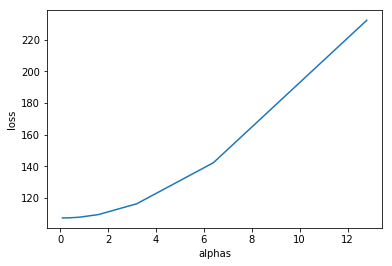

In [123]:
# 图形化学习率与误差的曲线
plt.plot(alphas, R_loss)
plt.xlabel('alphas')
plt.ylabel('loss')
plt.show()

In [117]:
# 学习曲线  随训练集样本数变化（用于检测过拟合）
# 1、高方差（过拟合问题） 随着训练集样本增加，训练误差（红色）减小，验证误差（绿色）先减后增
# 解决：增加样本数、使用更少的特征、增加惩罚项系数值      
# 2、高偏差（欠拟合问题） 随着训练集样本增加，训练误差（红色）缓慢增加，验证误差（绿色）缓慢减少
# 解决：增加特征、增加高维度特征（x1,x2,x1平方,x2平方）、减少惩罚项系数值  
train_sizes, train_loss, test_loss = \
    learning_curve(model, X, Y, cv=10, scoring="neg_mean_squared_error",train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


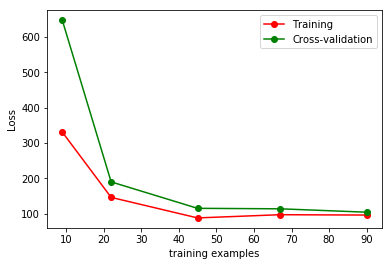

In [118]:
# 图形化学习曲线 
plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Cross-validation")
print(model)
plt.xlabel("training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

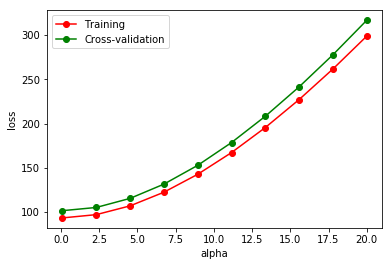

In [119]:
# 验证曲线(学习率alpha曲线)
param_range = np.linspace(0.1, 20, num=10)
train_loss, test_loss \
    = validation_curve(model, X, Y, param_name='alpha', 
                       param_range=param_range, cv=10, scoring="neg_mean_squared_error")
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 图形化验证曲线 
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross-validation")

plt.xlabel("alpha")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

In [130]:
# 保存模型到save/lr.pkl
joblib.dump(model, 'save/lr.pkl')
# 读save/lr.pkl模型文件
model1 = joblib.load('save/lr.pkl')
print(model1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [128]:
# 误差分析
# 分析交叉验证集中 错误预测的数据：1、类型 2、特征线索


In [ ]:
# 精确度 越高越好
# 流动度为例：true m/true m+false m
# 召回率 越高越好
# true m/$actual m